In [1]:
!pip install numpy==1.24.0
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot

In [3]:
from pmdarima.datasets import load_airpassengers
import warnings
warnings.filterwarnings('ignore')

veri_aylık = pd.DataFrame(load_airpassengers(as_series=True),columns=["Yolcu Sayısı"],dtype=int)
print(veri_aylık)

     Yolcu Sayısı
0             112
1             118
2             132
3             129
4             121
..            ...
139           606
140           508
141           461
142           390
143           432

[144 rows x 1 columns]


In [4]:
tarih = pd.date_range("01.01.1995",periods=len(veri_aylık),freq="M")
veri_aylık["Tarih"] = tarih
veri_aylık.set_index("Tarih",inplace=True)
print(veri_aylık)

            Yolcu Sayısı
Tarih                   
1995-01-31           112
1995-02-28           118
1995-03-31           132
1995-04-30           129
1995-05-31           121
...                  ...
2006-08-31           606
2006-09-30           508
2006-10-31           461
2006-11-30           390
2006-12-31           432

[144 rows x 1 columns]


In [5]:
print(veri_aylık.isnull().sum())

Yolcu Sayısı    0
dtype: int64


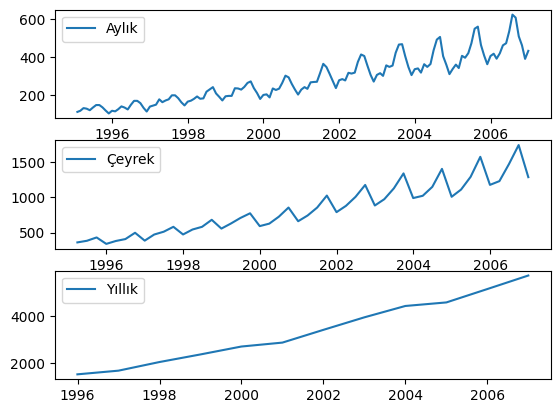

In [6]:
veri_ceyrek = veri_aylık.resample("Q").sum()
veri_yıllık = veri_aylık.resample("Y").sum()

fig,ax= plt.subplots(3,1)
ax[0].plot(veri_aylık,label="Aylık")
ax[0].legend(loc="upper left")
ax[1].plot(veri_ceyrek,label="Çeyrek")
ax[1].legend(loc="upper left")
ax[2].plot(veri_yıllık,label="Yıllık")
ax[2].legend(loc="upper left")
plt.show()

In [7]:
ist1 = veri_aylık.describe().transpose()
ist2 = veri_ceyrek.describe().transpose()
ist3 = veri_yıllık.describe().transpose()

bestist = pd.concat([ist1,ist2,ist3])
indekseler = ["Aylık Yolcu Sayısı","Çeyreklik Yolcu Sayısı","Yıllık Yolcu Sayısı"]
bestist.index = indekseler
print(bestist)

                        count         mean          std     min      25%  \
Aylık Yolcu Sayısı      144.0   280.298611   119.966317   104.0   180.00   
Çeyreklik Yolcu Sayısı   48.0   840.895833   356.431441   341.0   553.75   
Yıllık Yolcu Sayısı      12.0  3363.583333  1390.585780  1520.0  2283.50   

                           50%      75%     max  
Aylık Yolcu Sayısı       265.5   360.50   622.0  
Çeyreklik Yolcu Sayısı   781.0  1112.25  1736.0  
Yıllık Yolcu Sayısı     3137.5  4458.75  5714.0  


In [8]:
veri_aylık["Ay"] = veri_aylık.index.month
veri_aylık["Yıl"] = veri_aylık.index.year
print(veri_aylık)

            Yolcu Sayısı  Ay   Yıl
Tarih                             
1995-01-31           112   1  1995
1995-02-28           118   2  1995
1995-03-31           132   3  1995
1995-04-30           129   4  1995
1995-05-31           121   5  1995
...                  ...  ..   ...
2006-08-31           606   8  2006
2006-09-30           508   9  2006
2006-10-31           461  10  2006
2006-11-30           390  11  2006
2006-12-31           432  12  2006

[144 rows x 3 columns]


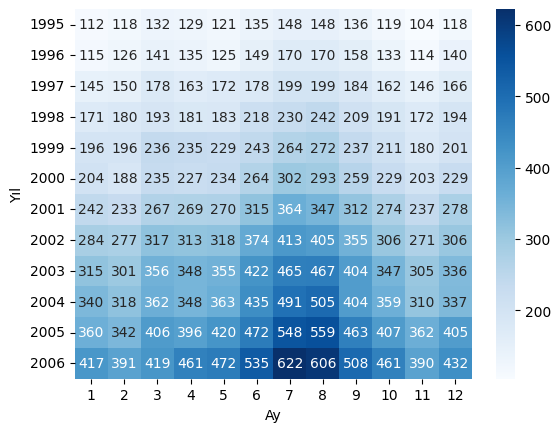

In [9]:
matris = pd.pivot_table(veri_aylık,values="Yolcu Sayısı",index="Yıl",columns="Ay")
renk = sns.color_palette("Blues",as_cmap=True)
sns.heatmap(matris,cmap=renk,annot=True,fmt="g")
plt.show()

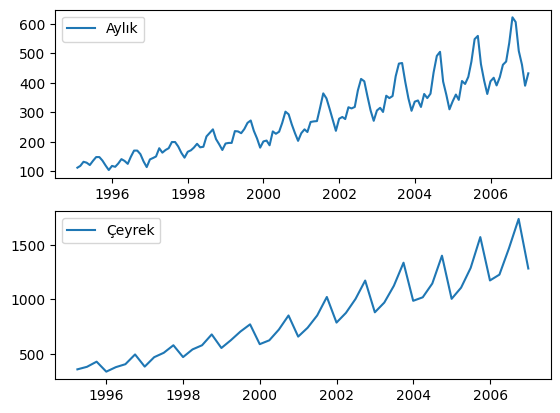

In [10]:
fig,ax= plt.subplots(2,1)
ax[0].plot(veri_aylık["Yolcu Sayısı"],label="Aylık")
ax[0].legend(loc="upper left")
ax[1].plot(veri_ceyrek["Yolcu Sayısı"],label="Çeyrek")
ax[1].legend(loc="upper left")
plt.show()

In [11]:
from scipy.stats import boxcox

veri_aylık_boxcox,lm = boxcox(veri_aylık["Yolcu Sayısı"])
veri_ceyrek_boxcox,lm2 = boxcox(veri_ceyrek["Yolcu Sayısı"])
veri_aylık["Box Cox"] = veri_aylık_boxcox
veri_ceyrek["Box Cox"] = veri_ceyrek_boxcox
print(veri_aylık)
print(veri_ceyrek)

            Yolcu Sayısı  Ay   Yıl    Box Cox
Tarih                                        
1995-01-31           112   1  1995   6.827488
1995-02-28           118   2  1995   6.932820
1995-03-31           132   3  1995   7.161889
1995-04-30           129   4  1995   7.114609
1995-05-31           121   5  1995   6.983785
...                  ...  ..   ...        ...
2006-08-31           606   8  2006  10.684045
2006-09-30           508   9  2006  10.234569
2006-10-31           461  10  2006   9.992156
2006-11-30           390  11  2006   9.582619
2006-12-31           432  12  2006   9.831857

[144 rows x 4 columns]
            Yolcu Sayısı    Box Cox
Tarih                              
1995-03-31           362  10.115586
1995-06-30           385  10.283681
1995-09-30           432  10.602745
1995-12-31           341   9.954174
1996-03-31           382  10.262237
1996-06-30           409  10.450416
1996-09-30           498  11.005267
1996-12-31           387  10.297901
1997-03-31        

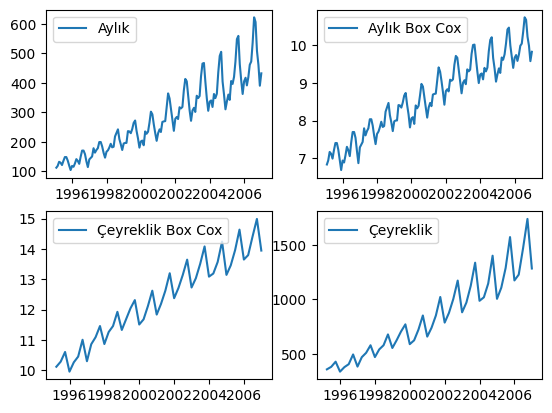

In [12]:
fig,ax= plt.subplots(2,2)
ax[0,0].plot(veri_aylık["Yolcu Sayısı"],label="Aylık")
ax[0,0].legend(loc="upper left")
ax[0,1].plot(veri_aylık["Box Cox"],label="Aylık Box Cox")
ax[0,1].legend(loc="upper left")
ax[1,0].plot(veri_ceyrek["Box Cox"],label="Çeyreklik Box Cox")
ax[1,0].legend(loc="upper left")
ax[1,1].plot(veri_ceyrek["Yolcu Sayısı"],label="Çeyreklik")
ax[1,1].legend(loc="upper left")
plt.show()

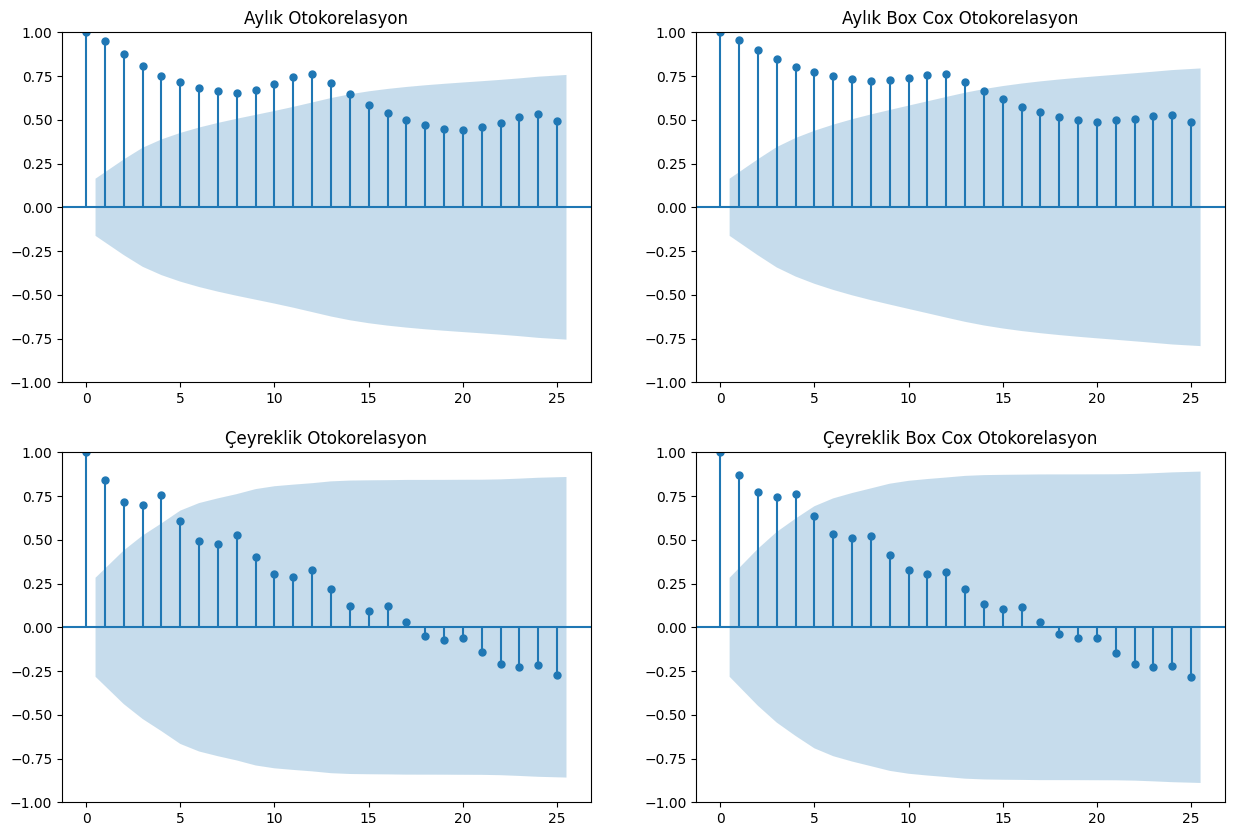

In [13]:
from statsmodels.graphics.tsaplots import quarter_plot

fix,ax = plt.subplots(2,2,figsize=(15,10))
plot_acf(veri_aylık["Yolcu Sayısı"],lags=25,ax=ax[0,0])
ax[0,0].set_title("Aylık Otokorelasyon")
plot_acf(veri_aylık["Box Cox"],lags=25,ax=ax[0,1])
ax[0,1].set_title("Aylık Box Cox Otokorelasyon")
plot_acf(veri_ceyrek["Yolcu Sayısı"],lags=25,ax=ax[1,0])
ax[1,0].set_title("Çeyreklik Otokorelasyon")
plot_acf(veri_ceyrek["Box Cox"],lags=25,ax=ax[1,1])
ax[1,1].set_title("Çeyreklik Box Cox Otokorelasyon")
plt.show()

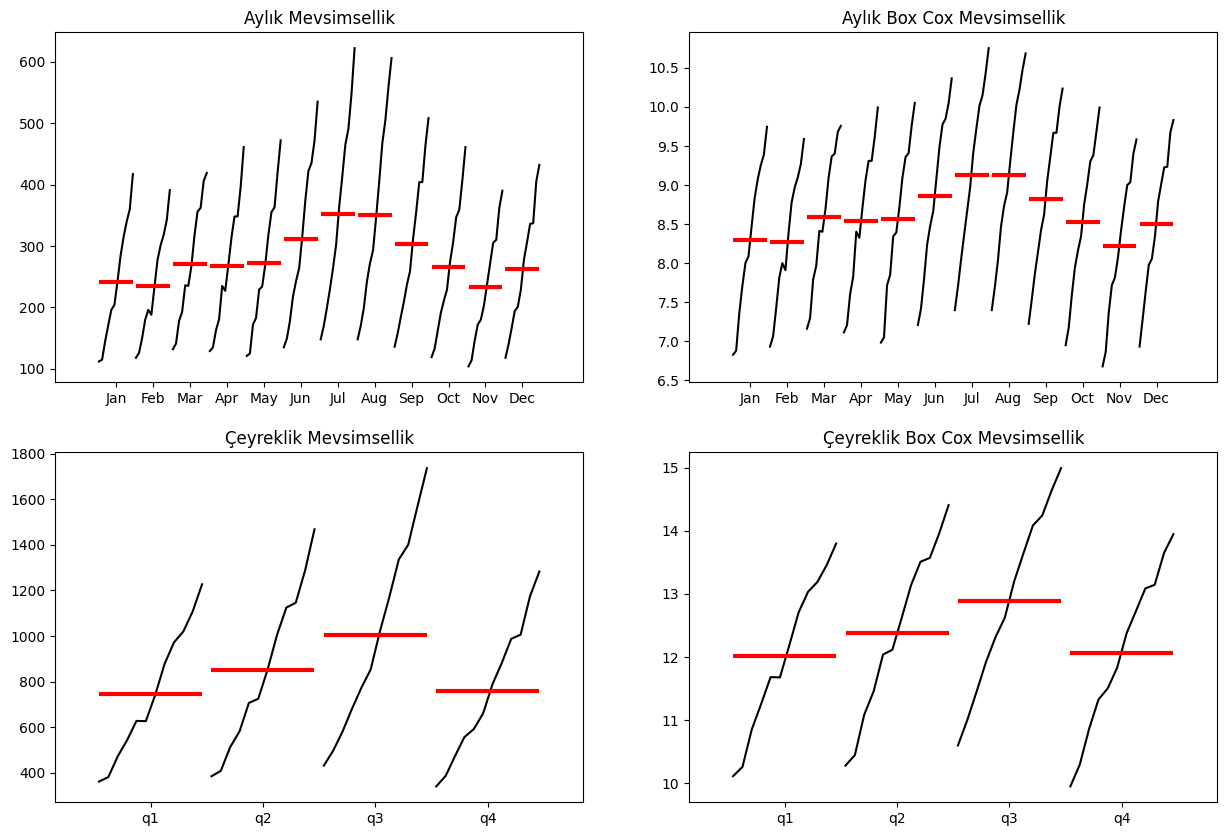

In [14]:
fix,ax = plt.subplots(2,2,figsize=(15,10))
month_plot(veri_aylık["Yolcu Sayısı"],ax=ax[0,0])
ax[0,0].set_title("Aylık Mevsimsellik")
month_plot(veri_aylık["Box Cox"],ax=ax[0,1])
ax[0,1].set_title("Aylık Box Cox Mevsimsellik")
quarter_plot(veri_ceyrek["Yolcu Sayısı"],ax=ax[1,0])
ax[1,0].set_title("Çeyreklik Mevsimsellik")
quarter_plot(veri_ceyrek["Box Cox"],ax=ax[1,1])
ax[1,1].set_title("Çeyreklik Box Cox Mevsimsellik")
plt.show()

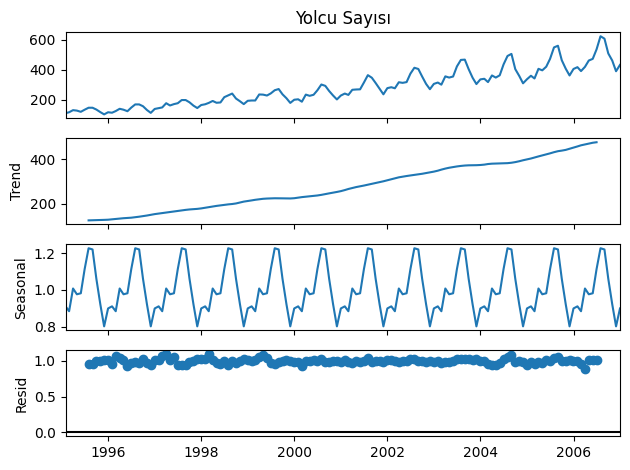

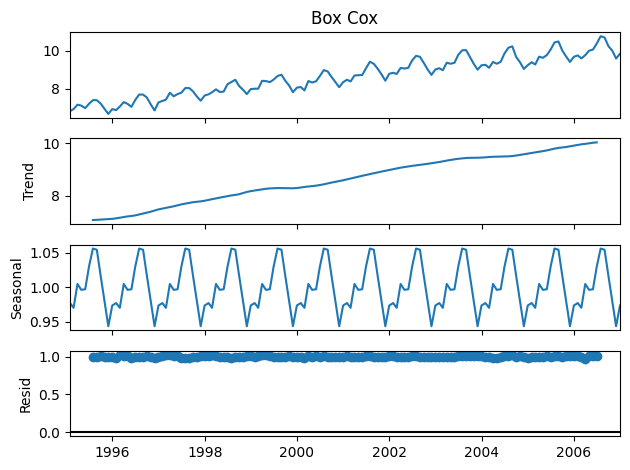

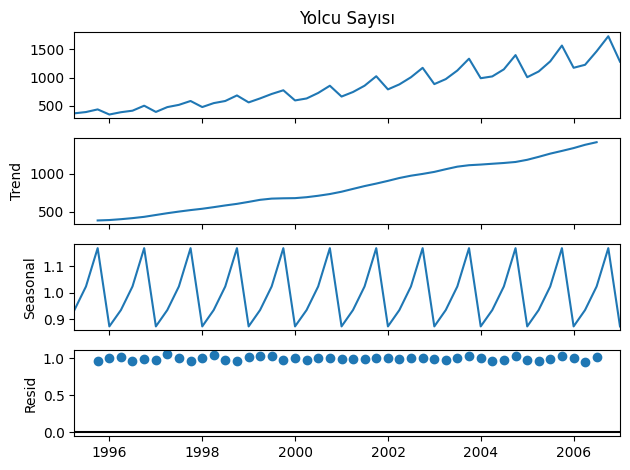

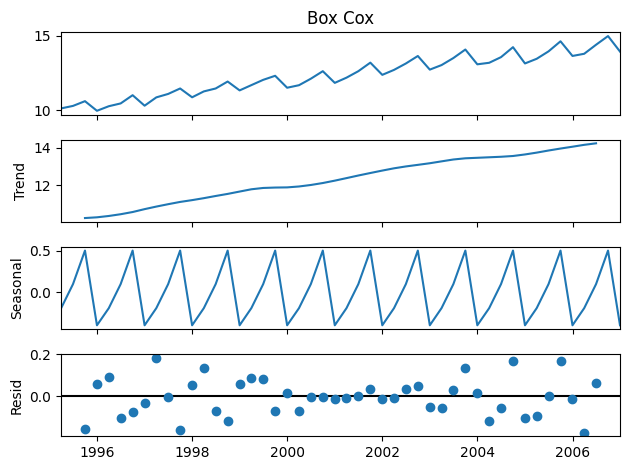

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

a = seasonal_decompose(veri_aylık["Yolcu Sayısı"],model="mul",period=12)
a.plot()

b = seasonal_decompose(veri_aylık["Box Cox"],model="mul",period=12)
b.plot()

c= seasonal_decompose(veri_ceyrek["Yolcu Sayısı"],model="mul",period=4)
c.plot()

d= seasonal_decompose(veri_ceyrek["Box Cox"],model="add",period=4)
d.plot()

plt.show()

In [17]:
veri_train = veri_aylık['Yolcu Sayısı'].iloc[:-12]
veri_test = veri_aylık['Yolcu Sayısı'].iloc[-12:]
print(veri_test)

Tarih
2006-01-31    417
2006-02-28    391
2006-03-31    419
2006-04-30    461
2006-05-31    472
2006-06-30    535
2006-07-31    622
2006-08-31    606
2006-09-30    508
2006-10-31    461
2006-11-30    390
2006-12-31    432
Name: Yolcu Sayısı, dtype: int64


In [18]:
ayrıs= seasonal_decompose(veri_train,model="mul",period=12,extrapolate_trend="freq")

veri = pd.concat([ayrıs.observed,
                  ayrıs.trend,
                  ayrıs.seasonal,
                  ayrıs.observed/ayrıs.seasonal],axis=1)

veri.columns = ["Observed","Trend","Seasonal","Observed/Seasonal"]
print(veri)






            Observed       Trend  Seasonal  Observed/Seasonal
Tarih                                                        
1995-01-31     112.0  118.588481  0.909983         123.079283
1995-02-28     118.0  119.734169  0.893216         132.106971
1995-03-31     132.0  120.879856  1.021380         129.236901
1995-04-30     129.0  122.025544  0.979458         131.705450
1995-05-31     121.0  123.171232  0.976657         123.892054
...              ...         ...       ...                ...
2005-08-31     559.0  430.219891  1.217181         459.257747
2005-09-30     463.0  434.019862  1.057779         437.709459
2005-10-31     407.0  437.819833  0.919291         442.732585
2005-11-30     362.0  441.619804  0.799215         452.944178
2005-12-31     405.0  445.419775  0.896787         451.612238

[132 rows x 4 columns]


In [19]:
indeks = np.arange(1,len(veri)+1)
veri["T"] = indeks
print(veri)

            Observed       Trend  Seasonal  Observed/Seasonal    T
Tarih                                                             
1995-01-31     112.0  118.588481  0.909983         123.079283    1
1995-02-28     118.0  119.734169  0.893216         132.106971    2
1995-03-31     132.0  120.879856  1.021380         129.236901    3
1995-04-30     129.0  122.025544  0.979458         131.705450    4
1995-05-31     121.0  123.171232  0.976657         123.892054    5
...              ...         ...       ...                ...  ...
2005-08-31     559.0  430.219891  1.217181         459.257747  128
2005-09-30     463.0  434.019862  1.057779         437.709459  129
2005-10-31     407.0  437.819833  0.919291         442.732585  130
2005-11-30     362.0  441.619804  0.799215         452.944178  131
2005-12-31     405.0  445.419775  0.896787         451.612238  132

[132 rows x 5 columns]


In [20]:
import statsmodels.api as sm

x = sm.add_constant(veri["T"])
y = veri["Observed/Seasonal"]
model = sm.OLS(y,x)
sonuc = model.fit()
print(sonuc.summary())


                            OLS Regression Results                            
Dep. Variable:      Observed/Seasonal   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     5467.
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          4.34e-108
Time:                        06:04:18   Log-Likelihood:                -544.89
No. Observations:                 132   AIC:                             1094.
Df Residuals:                     130   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.4167      2.649     34.890      0.0

In [21]:
veri_test = pd.DataFrame(veri_test)
veri_test["Seasonal"] = veri['Seasonal'].iloc[:12].values
print(veri_test)

            Yolcu Sayısı  Seasonal
Tarih                             
2006-01-31           417  0.909983
2006-02-28           391  0.893216
2006-03-31           419  1.021380
2006-04-30           461  0.979458
2006-05-31           472  0.976657
2006-06-30           535  1.105417
2006-07-31           622  1.223636
2006-08-31           606  1.217181
2006-09-30           508  1.057779
2006-10-31           461  0.919291
2006-11-30           390  0.799215
2006-12-31           432  0.896787


In [22]:
girdi = np.arange(len(veri.index)+1,len(veri.index)+13)

print(indeks)
print(girdi)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132]
[133 134 135 136 137 138 139 140 141 142 143 144]


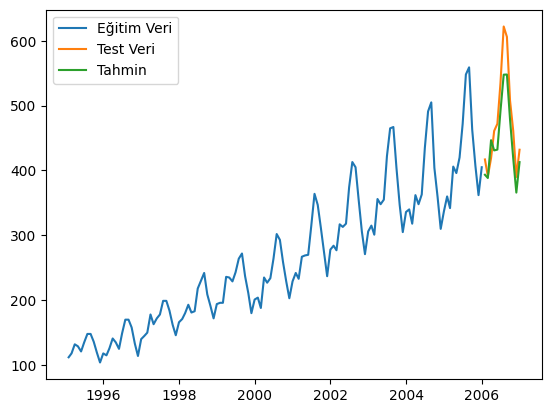

In [24]:
tahmin = sonuc.predict(sm.add_constant(girdi))
veri_test["Tahmin"] = tahmin*veri_test["Seasonal"]


plt.plot(veri['Observed'],label="Eğitim Veri")
plt.plot(veri_test["Yolcu Sayısı"],label="Test Veri")
plt.plot(veri_test["Tahmin"],label="Tahmin")
plt.legend(loc="upper left")
plt.show()




In [27]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(veri_test["Yolcu Sayısı"],veri_test["Tahmin"])))

38.908370941910235


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


trend_tip = ["add","mul"]
seasoneal_tip =["add","mul"]

for i in trend_tip:
  for j in seasoneal_tip:
    holtwinmodel = ExponentialSmoothing(veri_train,trend=i,seasonal=j,seasonal_periods=12).fit(optimized=True)
    tahmin = holtwinmodel.forecast(12)
    rmse=np.sqrt(mean_squared_error(veri_test["Yolcu Sayısı"],tahmin))
    print("Trend:{} Mevsimsellik:{} RMSE:{}".format(i,j,rmse))

Trend:add Mevsimsellik:add RMSE:16.979906128442913
Trend:add Mevsimsellik:mul RMSE:15.807367605699495
Trend:mul Mevsimsellik:add RMSE:16.513615846250456
Trend:mul Mevsimsellik:mul RMSE:25.810226318474683


In [31]:
holtwinmodel = ExponentialSmoothing(veri_train,trend="add",seasonal="mul",seasonal_periods=12).fit(optimized=True)
tahmin = holtwinmodel.forecast(12)
rmse=np.sqrt(mean_squared_error(veri_test["Yolcu Sayısı"],tahmin))
print(rmse)

15.807367605699495


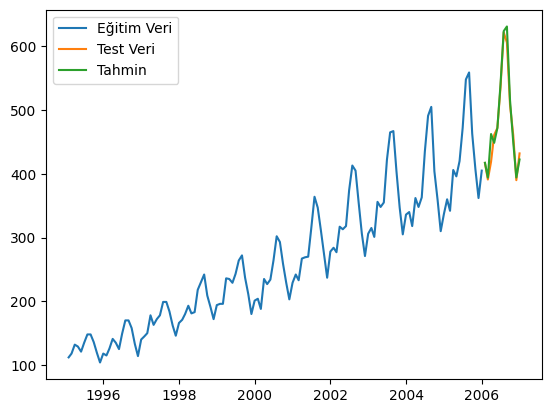

In [36]:
plt.plot(veri_train,label="Eğitim Veri")
plt.plot(veri_test['Yolcu Sayısı'],label="Test Veri")
plt.plot(tahmin,label="Tahmin")
plt.legend(loc="upper left")
plt.show()

In [54]:
veri_train = pd.DataFrame(veri_train)
veri_test = pd.DataFrame(veri_test)
veri_test["Seasonal"] = veri['Seasonal'].iloc[-12:].values
print(veri_test)

            Yolcu Sayısı  Seasonal      Tahmin
Tarih                                         
2006-01-31           417  0.909983  393.366288
2006-02-28           391  0.893216  388.400748
2006-03-31           419  1.021380  446.741083
2006-04-30           461  0.979458  430.907796
2006-05-31           472  0.976657  432.170919
2006-06-30           535  1.105417  491.972121
2006-07-31           622  1.223636  547.712929
2006-08-31           606  1.217181  547.934205
2006-09-30           508  1.057779  478.879716
2006-10-31           461  0.919291  418.532084
2006-11-30           390  0.799215  365.906810
2006-12-31           432  0.896787  412.869845


In [41]:
!pip install arch
from arch.unitroot import ADF,KPSS

adf = ADF(veri_train,trend="ct")
kpss = KPSS(veri_train,trend="ct")
print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.040
P-value                         0.579
Lags                               13
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.04 (1%), -3.45 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.088
P-value                         0.219
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [56]:
ayrıs= seasonal_decompose(veri_train,model="mul",period=12,extrapolate_trend="freq")

veri = pd.concat([ayrıs.observed,
                  ayrıs.trend,
                  ayrıs.seasonal,
                  ayrıs.observed/ayrıs.seasonal],axis=1)

veri.columns = ["Observed","Trend","Seasonal","Observed/Seasonal"]

adf = ADF(veri["Observed/Seasonal"],trend="ct")
kpss = KPSS(veri["Observed/Seasonal"],trend="ct")
print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.863
P-value                         0.673
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.03 (1%), -3.45 (5%), -3.15 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.282
P-value                         0.002
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [61]:
model = auto_arima(veri_train["Yolcu Sayısı"],trace=False,seasonal=True,m=12)
print(model)

 ARIMA(3,0,0)(0,1,0)[12] intercept


In [62]:
tahmin = model.predict(12)
rmse = np.sqrt(mean_squared_error(veri_test["Yolcu Sayısı"],tahmin))
print(rmse)

18.53646891795526


In [59]:
model = auto_arima(veri["Observed/Seasonal"],trace=False,seasonal=True,m=12)
tahmin = model.predict(12)*veri_test["Seasonal"]
rmse = np.sqrt(mean_squared_error(veri_test["Yolcu Sayısı"],tahmin))
print(rmse)

19.096881920620746


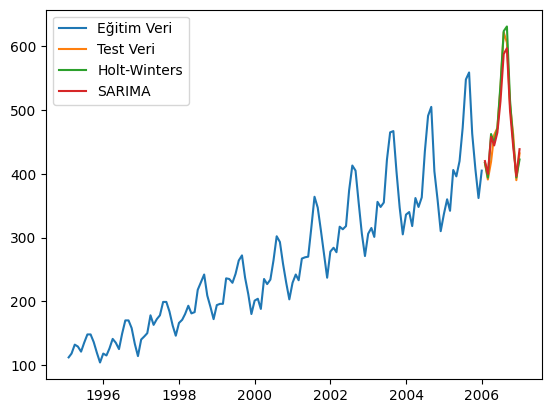

In [63]:
holtwinmodel = ExponentialSmoothing(veri_train,trend="add",seasonal="mul",seasonal_periods=12).fit(optimized=True)
tahminhw = holtwinmodel.forecast(12)
tahminar = model.predict(12)
plt.plot(veri_train["Yolcu Sayısı"],label="Eğitim Veri")
plt.plot(veri_test["Yolcu Sayısı"],label="Test Veri")
plt.plot(tahminhw,label="Holt-Winters")
plt.plot(tahminar,label="SARIMA")
plt.legend(loc="upper left")
plt.show()